## 3.1 Linear Basis Function Models

$ y(\mathbf{x},\mathbf{w}) = w_0 + w_1 x_1 + \ldots + w_D x_D $

$ y(\mathbf{x},\mathbf{w}) = w_0 + w_1 \phi_1(\mathbf{x}) + \ldots + w_{M-1} \phi_{M-1}(\mathbf{x}) $, where $\phi_j(\mathbf{x})$ are basis functions

To put it simply,

$ y(\mathbf{x},\mathbf{w}) = \sum_{j=0}^{M-1} w_j \phi_j(\mathbf{x}) = \mathbf{w}^{T} \mathbf{\phi}(\mathbf{x}) $, where $\phi_0(\mathbf{x}) = 1 $

Examples of basis functions:
 - polynomials: $\phi_j(x) = x^j$
 - 'Gaussian': $\phi_j(x) = \exp\{ -\frac{(x-\mu_j)^2}{2s^2} \}$
 - sigmoidal: $\phi_j(x) = \frac{1}{1+\exp(-(x-\mu_j)/s)}$
 
 <img src="basis_functions.png">

### Maximum likelihood and least squares

$ t = y(\mathbf{x}, \mathbf{w}) + \epsilon $, where $\epsilon$ is a zero mean Gaussian random variable with variance $\beta^{-1}$

$ p(t | \mathbf{x}, \mathbf{w}, \beta) = N(t | y(\mathbf{x}, \mathbf{w}), \beta^{-1})$

Considering a data set of inputs $\mathbf{X} = {\mathbf{x}_1, \ldots, \mathbf{x}_N}$,

$ p(\mathbf{t} | \mathbf{x}, \mathbf{w}, \beta) = \prod_{n=1}^N N(t_n | \mathbf{w}^{T} \mathbf{\phi}(\mathbf{x}),  \beta^{-1})  $

Taking the logarithm of the likelihood function,

$ \ln p(\mathbf{t} | \mathbf{x}, \mathbf{w}, \beta) = \sum_{n=1}^N \ln N(t_n | \mathbf{w}^{T} \mathbf{\phi}(\mathbf{x}),  \beta^{-1})
= \frac{N}{2}\ln \beta - \frac{N}{2} \ln(2\pi) - \beta \frac{1}{2} \sum[t_n - \mathbf{w}^{T} \mathbf{\phi}(\mathbf{x}_n)]^2 = \frac{N}{2}\ln \beta - \frac{N}{2} \ln(2\pi) - \beta E(\mathbf{w}) $

Hence, maximising the likelihood function is equal to minimising a sum-of-squares error function.

The gradient of the log likelihood function 

$ \nabla \ln p(\mathbf{t} | \mathbf{x}, \mathbf{w}, \beta) = \sum[t_n - \mathbf{w}^{T} \mathbf{\phi}(\mathbf{x}_n)] \mathbf{\phi}(\mathbf{x}_n)^T $

### Sequential learning

Instead of processing the entire training set in one go, sequential (or on-line) algorithms for updating the model parameters:

#### stochastic (or sequential) gradient descent

Updates the parameter vector $\mathbf{w}$ using

$ \mathbf{w}^{(k+1)} = \mathbf{w}^{(k)} - \eta \nabla E_n $

For the case of the sum-of-squares error function,

$ \mathbf{w}^{(k+1)} = \mathbf{w}^{(k)} + \eta [t_n - \mathbf{w}^{(k)T}\mathbf{\phi}(\mathbf{x}_n)]\mathbf{\phi}(\mathbf{x}_n) $


### Regularised least squares

Adding a regularisation term to an error function:

$ E(\mathbf{w}) + \lambda E_W(\mathbf{w}) $, where $\lambda$ is the regularisation coefficient.

One of the simplest forms of regularizer is the sum-of-squares of the wieght vector elements:

$ E_W(\mathbf{w}) = \frac{1}{2} \mathbf{w}^T \mathbf{w} $

Hence, the total error function becomes

$ \frac{1}{2} \sum[t_n - \mathbf{w}^{T} \mathbf{\phi}(\mathbf{x}_n)]^2 + \frac{\lambda}{2} \mathbf{w}^T \mathbf{w} $

This particular choice of regulariser is known
 - in machine learning, weight decay
 - in statistics, parameter shrinkage

## 3.3 Bayesian Linear Regression

- Avoding the over-fitting problem of maximum likelihood
- Automatic methods of determining model complexity using the training data alone

### Example: Bayesian Inference

$ y(x, \mathbf{w}) = w_0 + w_1 x = -0.3 + 0.5 x $

$ t = y(x, \mathbf{w}) + \epsilon $, where $\epsilon \sim N(0, 0.2^2)$

Prior distribution: $ p(\mathbf{w} | \alpha) = N(\mathbf{w} | \mathbf{0}, \alpha^{-1} \mathrm{I})$, where $\alpha (= 2.0)$ is assumed to be known.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from numpy.linalg import inv

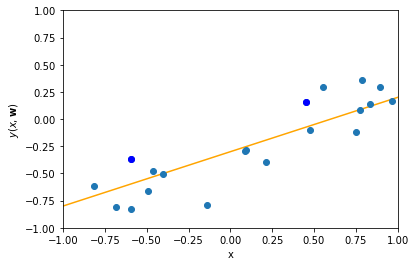

In [2]:
sample_size = 20.0
sigma_noise = 0.2
beta = (1.0/sigma_noise)**2
w0_true = -0.3
w1_true = 0.5
x_sample = np.random.uniform(-1, 1, sample_size)
t = w0_true + w1_true * x_sample + np.random.normal(0, sigma_noise, sample_size)
x_base = np.linspace(-1, 1, 100)
y = w0_true + w1_true * x_base

plt.plot(x_base, y, 'orange')
plt.plot(x_sample, t, 'o')
plt.plot(x_sample[0], t[0], 'bo')
plt.plot(x_sample[1], t[1], 'bo')
plt.xlim([-1,1]); plt.ylim([-1,1])
plt.xlabel('x'); plt.ylabel('$y(x,\mathbf{w})$')
plt.show()

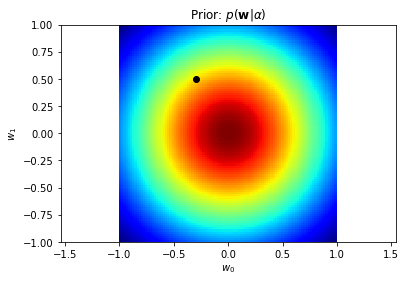

In [3]:
size = 100
alpha = 2.0
sigma_w = np.sqrt(1.0/alpha)
w0_base = np.linspace(-1, 1, size)
w1_base = np.linspace(-1, 1, size)
W0, W1 = np.meshgrid(w0_base, w0_base)
#z = (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-(x**2/(2*sigma_x**2) + y**2/(2*sigma_y**2))))
z0 = bivariate_normal(W0, W1, sigma_w, sigma_w, 0.0, 0.0)
plt.pcolormesh(W0, W1, z0, cmap=cm.jet)
plt.plot(w0_true, w1_true, 'o', color = 'black')
plt.axis('equal')
plt.xlabel('$w_0$'); plt.ylabel('$w_1$')
plt.title(r'Prior: $p(\mathbf{w} | \alpha )$')
plt.show()

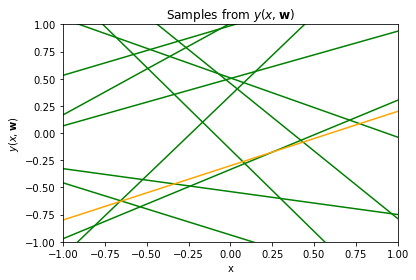

In [4]:
## Samples of (w_0, w_1)
mean = [0, 0]
cov = [[sigma_w**2, 0], [0, sigma_w**2]]  # diagonal covariance
w0, w1 = np.random.multivariate_normal(mean, cov, 10).T
x_base = np.linspace(-1, 1, 100)
y_base = w0_true + w1_true * x_base
for i in range(len(w0)):
    y_sample = w0[i] + w1[i] * x_base
    plt.plot(x_base, y_sample, 'green')
plt.xlim([-1,1]); plt.ylim([-1,1])
plt.xlabel('x'); plt.ylabel(r'$y(x,\mathbf{w})$')
plt.title(r'Samples from $y(x, \mathbf{w})$')
plt.plot(x_base, y_base, 'orange')
plt.show()

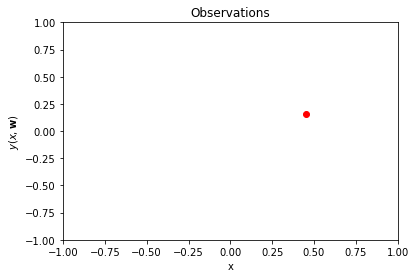

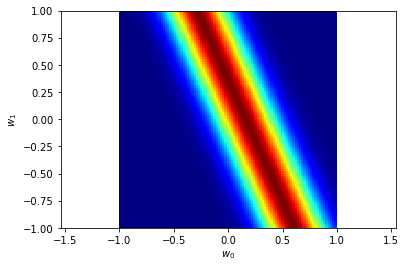

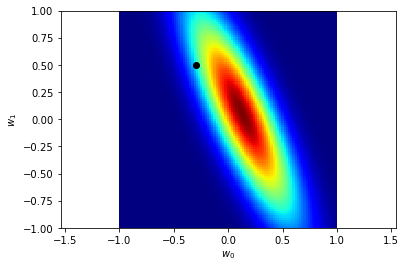

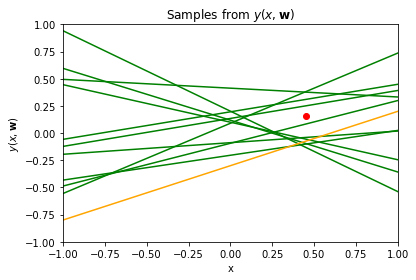

In [5]:
# observation
plt.plot(x_sample[0], t[0], 'ro')
plt.xlim([-1,1]); plt.ylim([-1,1])
plt.xlabel('x'); plt.ylabel('$y(x,\mathbf{w})$')
plt.title('Observations')
plt.show()

# likelihood function given a data point (x_sample[0], t[0])
z_lik = (1/np.sqrt(2*np.pi*sigma_noise**2)) * np.exp(-((t[0] - (W0 + W1 * x_sample[0]))**2/(2*sigma_noise**2)))
plt.pcolormesh(W0, W1, z_lik, cmap=cm.jet)
plt.axis('equal')
plt.xlabel('$w_0$'); plt.ylabel('$w_1$')
plt.show()

# posterior distribution
X = np.matrix([[1], [x_sample[0]]])
m0 = np.matrix([[0],[0]])
S0 = 1/alpha * np.identity(2)
SN = inv(inv(S0) + beta * np.dot(X, X.T))
mN = np.dot(SN, (np.dot(inv(S0), m0) + beta * X * t[0]))

#z = z0 * z_lik # posterior ~ prior * likelihood w/o normalisation term
z = bivariate_normal(W0, W1, np.sqrt(SN[0,0]), np.sqrt(SN[1,1]), mN[0,0], mN[1,0], SN[0,1])
plt.pcolormesh(W0, W1, z, cmap=cm.jet)
plt.plot(w0_true, w1_true, 'o', color = 'black')
plt.axis('equal')
plt.xlabel('$w_0$'); plt.ylabel('$w_1$')
plt.show()


# samples from y(x,w)
# draw w samples from posterior
w0, w1 = np.random.multivariate_normal(np.squeeze(np.asarray(mN)), SN, 10).T
for i in range(len(w0)):
    y_sample = w0[i] + w1[i] * x_base
    plt.plot(x_base, y_sample, 'green')
plt.xlim([-1,1]); plt.ylim([-1,1])
plt.xlabel('x'); plt.ylabel(r'$y(x,\mathbf{w})$')
plt.title(r'Samples from $y(x, \mathbf{w})$')
plt.plot(x_base, y_base, 'orange')
plt.plot(x_sample[0], t[0], 'ro')
plt.show()

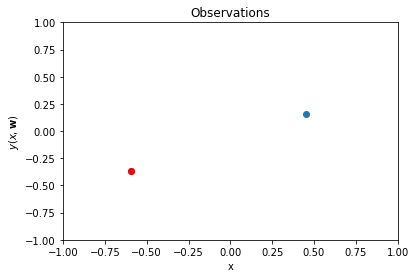

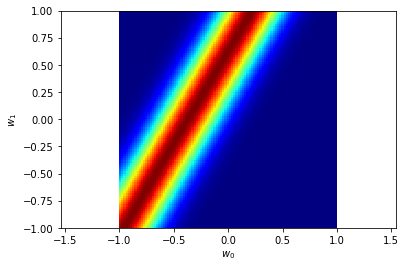

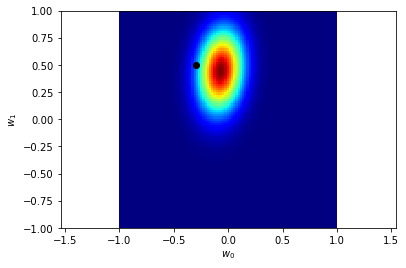

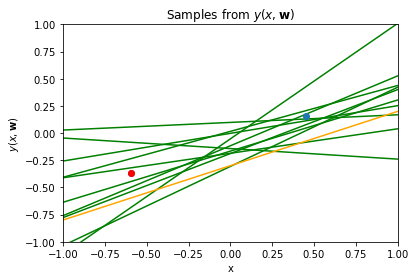

In [6]:
# observation
plt.plot(x_sample[:2], t[:2], 'o')
plt.plot(x_sample[1], t[1], 'ro')
plt.xlim([-1,1]); plt.ylim([-1,1])
plt.xlabel('x'); plt.ylabel('$y(x,\mathbf{w})$')
plt.title('Observations')
plt.show()

# likelihood function given a data point (x_sample[0], t[0])
z_lik = (1/np.sqrt(2*np.pi*sigma_noise**2)) * np.exp(-((t[1] - (W0 + W1 * x_sample[1]))**2/(2*sigma_noise**2)))
plt.pcolormesh(W0, W1, z_lik, cmap=cm.jet)
plt.axis('equal')
plt.xlabel('$w_0$'); plt.ylabel('$w_1$')
plt.show()

# posterior distribution
X = np.matrix([[1], [x_sample[1]]])
S0 = np.copy(SN)
SN = inv(inv(S0) + beta * np.dot(X, X.T))
mN = np.dot(SN, (np.dot(inv(S0), mN) + beta * X * t[1]))


#z = z1 * z_lik
z = bivariate_normal(W0, W1, np.sqrt(SN[0,0]), np.sqrt(SN[1,1]), mN[0,0], mN[1,0], SN[0,1])
plt.pcolormesh(W0, W1, z, cmap=cm.jet)
plt.plot(w0_true, w1_true, 'o', color = 'black')
plt.axis('equal')
plt.xlabel('$w_0$'); plt.ylabel('$w_1$')
plt.show()



# samples from y(x,w)
# draw w samples from posterior
w0, w1 = np.random.multivariate_normal(np.squeeze(np.asarray(mN)), SN, 10).T
for i in range(len(w0)):
    y_sample = w0[i] + w1[i] * x_base
    plt.plot(x_base, y_sample, 'green')
plt.xlim([-1,1]); plt.ylim([-1,1])
plt.xlabel('x'); plt.ylabel(r'$y(x,\mathbf{w})$')
plt.title(r'Samples from $y(x, \mathbf{w})$')
plt.plot(x_base, y_base, 'orange')
plt.plot(x_sample[:2], t[:2], 'o')
plt.plot(x_sample[1], t[1], 'ro')
plt.show()

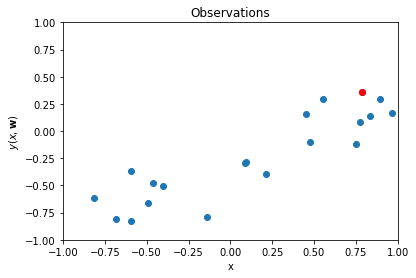

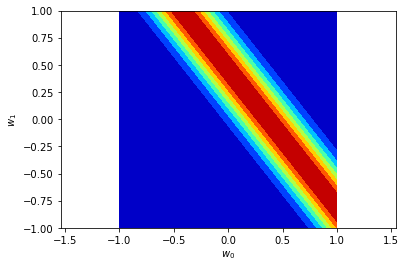

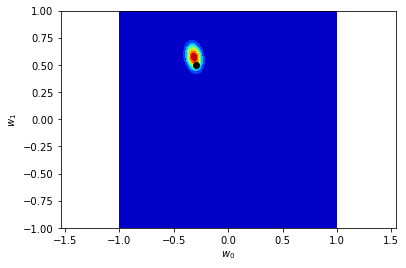

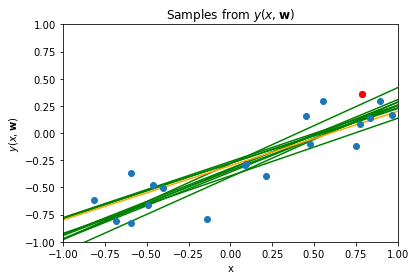

In [7]:
# observation
plt.plot(x_sample, t, 'o')
plt.plot(x_sample[-1], t[-1], 'ro')
plt.xlim([-1,1]); plt.ylim([-1,1])
plt.xlabel('x'); plt.ylabel('$y(x,\mathbf{w})$')
plt.title('Observations')
plt.show()

# likelihood function given a data point (x_sample[0], t[0])
z_lik = (1/np.sqrt(2*np.pi*sigma_noise**2)) * np.exp(-((t[-1] - (W0 + W1 * x_sample[-1]))**2/(2*sigma_noise**2)))
plt.contourf(W0, W1, z_lik, cmap=cm.jet)
plt.axis('equal')
plt.xlabel('$w_0$'); plt.ylabel('$w_1$')
plt.show()

# posterior distribution
for i in range(sample_size - 2):
    X = np.matrix([[1], [x_sample[i+2]]])
    S0 = np.copy(SN)
    SN = inv(inv(S0) + beta * np.dot(X, X.T))
    mN = np.dot(SN, (np.dot(inv(S0), mN) + beta * X * t[i+2]))
    #z_lik = (1/np.sqrt(2*np.pi*sigma_noise**2)) * np.exp(-((t[i+2] - (W0 + W1 * x_sample[i+2]))**2/(2*sigma_noise**2)))
    #z = z * z_lik
    
z = bivariate_normal(W0, W1, np.sqrt(SN[0,0]), np.sqrt(SN[1,1]), mN[0,0], mN[1,0], SN[0,1])
plt.contourf(W0, W1, z, cmap=cm.jet)
plt.plot(w0_true, w1_true, 'o', color = 'black')
plt.axis('equal')
plt.xlabel('$w_0$'); plt.ylabel('$w_1$')
plt.show()

# samples from y(x,w)
# draw w samples from posterior
w0, w1 = np.random.multivariate_normal(np.squeeze(np.asarray(mN)), SN, 10).T
for i in range(len(w0)):
    y_sample = w0[i] + w1[i] * x_base
    plt.plot(x_base, y_sample, 'green')
plt.xlim([-1,1]); plt.ylim([-1,1])
plt.xlabel('x'); plt.ylabel(r'$y(x,\mathbf{w})$')
plt.title(r'Samples from $y(x, \mathbf{w})$')
plt.plot(x_base, y_base, 'orange')
plt.plot(x_sample, t, 'o')
plt.plot(x_sample[-1], t[-1], 'ro')
plt.show()

### Example: Bayesian Prediction


$ t = 2\pi x + \epsilon $, where $\epsilon \sim N(0, \beta^{-1})$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from numpy.linalg import inv

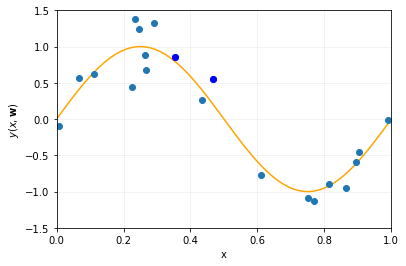

In [2]:
sample_size = 20.0
sigma_noise = 0.2
beta = (1.0/sigma_noise)**2.0
alpha = 2.0
x_sample = np.random.uniform(0, 1, sample_size)
t = np.sin(2.0 * np.pi * x_sample) + np.random.normal(0, sigma_noise, sample_size)
x_base = np.linspace(0, 1, 100)
y = np.sin(2.0 * np.pi * x_base)

plt.figure()
plt.plot(x_base, y, 'orange')
plt.plot(x_sample, t, 'o')
plt.plot(x_sample[0], t[0], 'bo')
plt.plot(x_sample[1], t[1], 'bo')
plt.xlim([0,1]); plt.ylim([-1.5,1.5])
plt.xlabel('x'); plt.ylabel(r'$y(x,\mathbf{w})$')
plt.grid(alpha = 0.2)
plt.show()

A combination of gaussian basis functions

$ y(x, \mathbf{w}) = w_0 + w_1 \phi_1(x) + \ldots + w_{9} \phi_9(x) $, 

where $\phi_j(x) = \exp\{ -\frac{(x-\mu_j)^2}{2s^2} \}$

$p(t ~|~ x, \mathbf{w}, \beta)  = N(t ~|~ y(x, \mathbf{w}), \beta^{-1})$

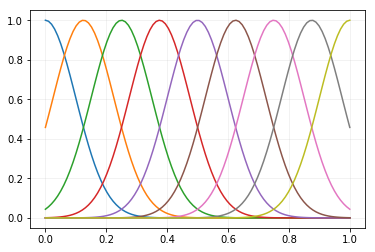

In [3]:
mus = np.linspace(0, 1, 9)
s = 0.1
plt.figure()
for i in range(len(mus)):
    plt.plot(x_base, np.exp(-(x_base - mus[i])**2 / (2*s**2)))
plt.grid(alpha = 0.2)
plt.show()

### Predictive distribution

$p(t_n ~|~x_n, \mathbf{x}, \mathbf{t}, \alpha, \beta)$

$= \int p(t_n ~|~ x_n, \mathbf{w}, \beta) p(\mathbf{w} ~|~ \mathbf{x}, \mathbf{t}, \alpha, \beta) \mathrm{d}\mathbf{w}$

$= N(t_n ~|~ \mathbf{m}_p^T \phi(x_n), ~ \sigma^2(x_n))$, where $\sigma^2(x_n) = \frac{1}{\beta} + \phi(x_n)^T \mathbf{S}_p \phi(x_n)$

Here, $\mathbf{m}_p$ and $\mathbf{S}_p$ are the mean and variance of the posterior distribution of $\mathbf{w}$.

In [4]:
def calc_gaussian_basis(x, mu_vals, sig_val):
    return np.exp(-(x - mu_vals)**2 / (2*sig_val**2))

def calc_pred_mean(x, wN, mus, s):
    X = np.concatenate(([1], calc_gaussian_basis(x, mus, s))).reshape(1, len(mus)+1)
    return np.squeeze(np.asarray(np.dot(wN.T, X.T)))

def calc_pred_var(x, SN, mus, s, beta):
    X = np.concatenate(([1], calc_gaussian_basis(x, mus, s))).reshape(1, len(mus)+1)
    return np.squeeze(np.asarray(1/beta + np.dot(np.dot(X, SN), X.T)))

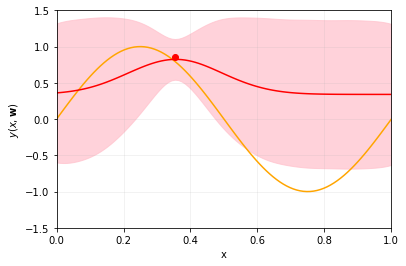

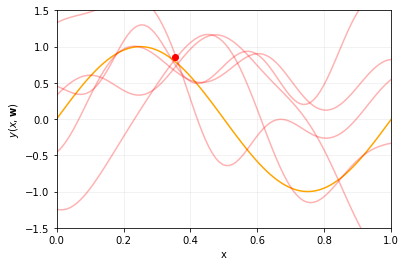

In [5]:
### After first observation
X = np.concatenate(([1], calc_gaussian_basis(x_sample[0], mus, s))).reshape(1, 10)
w0 = np.zeros((1,10)).T
S0 = 1/alpha * np.identity(10)
SN = inv(inv(S0) + beta * np.dot(X.T, X))
wN = np.dot(SN, (np.dot(inv(S0), w0) + beta * X.T * t[0]))

pred_mean = np.asarray([calc_pred_mean(k, wN, mus, s) for k in x_base])
pred_var = np.asarray([calc_pred_var(k, SN, mus, s, beta) for k in x_base])

#plt.figure(figsize = (12,6))
#plt.subplot(121)
plt.plot(x_base, y, 'orange')
plt.plot(x_sample[0], t[0], 'ro')
plt.plot(x_base, pred_mean, 'red')
plt.xlim([0,1]); plt.ylim([-1.5,1.5])
plt.xlabel('x'); plt.ylabel(r'$y(x,\mathbf{w})$')
plt.fill_between(x_base, pred_mean - np.sqrt(pred_var), pred_mean + np.sqrt(pred_var), color = 'pink', alpha=0.7)
plt.grid(alpha = 0.2)
plt.show()

# samples from y(x,w)
#plt.subplot(122)
plt.plot(x_base, y, 'orange')
plt.plot(x_sample[0], t[0], 'ro')
plt.xlim([0,1]); plt.ylim([-1.5,1.5])
plt.xlabel('x'); plt.ylabel('$y(x,\mathbf{w})$')
plt.grid(alpha = 0.2)
for i in range(5):
    w_sample = np.squeeze(np.random.multivariate_normal(np.squeeze(wN), SN, 1))
    pred_sample = np.asarray([calc_pred_mean(k, w_sample, mus, s) for k in x_base])
    plt.plot(x_base, pred_sample, 'red', alpha=0.3)
plt.show()

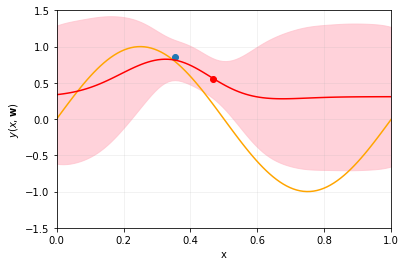

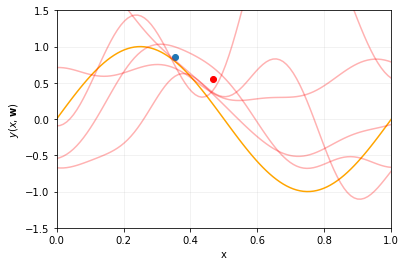

In [6]:
### After second observation
X = np.concatenate(([1], calc_gaussian_basis(x_sample[1], mus, s))).reshape(1, 10)
w0 = wN.copy()
S0 = SN.copy()
SN = inv(inv(S0) + beta * np.dot(X.T, X))
wN = np.dot(SN, (np.dot(inv(S0), w0) + beta * X.T * t[1]))

pred_mean = np.asarray([calc_pred_mean(k, wN, mus, s) for k in x_base])
pred_var = np.asarray([calc_pred_var(k, SN, mus, s, beta) for k in x_base])

#plt.figure(figsize = (12,6))
#plt.subplot(121)
plt.plot(x_base, y, 'orange')
plt.plot(x_sample[0], t[0], 'o')
plt.plot(x_sample[1], t[1], 'ro')
plt.plot(x_base, pred_mean, 'red')
plt.xlim([0,1]); plt.ylim([-1.5,1.5])
plt.xlabel('x'); plt.ylabel(r'$y(x,\mathbf{w})$')
plt.fill_between(x_base, pred_mean - np.sqrt(pred_var), pred_mean + np.sqrt(pred_var), color = 'pink', alpha=0.7)
plt.grid(alpha = 0.2)
plt.show()

# samples from y(x,w)
#plt.subplot(122)
plt.plot(x_base, y, 'orange')
plt.plot(x_sample[0], t[0], 'o')
plt.plot(x_sample[1], t[1], 'ro')
plt.xlim([0,1]); plt.ylim([-1.5,1.5])
plt.xlabel('x'); plt.ylabel(r'$y(x,\mathbf{w})$')
plt.grid(alpha = 0.2)
for i in range(5):
    w_sample = np.squeeze(np.random.multivariate_normal(np.squeeze(wN), SN, 1))
    pred_sample = np.asarray([calc_pred_mean(k, w_sample, mus, s) for k in x_base])
    plt.plot(x_base, pred_sample, 'red', alpha=0.3)
plt.show()

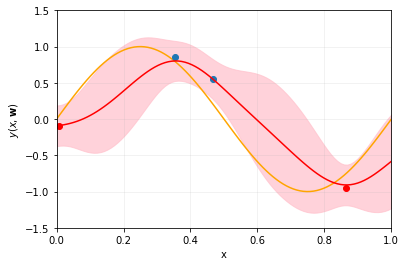

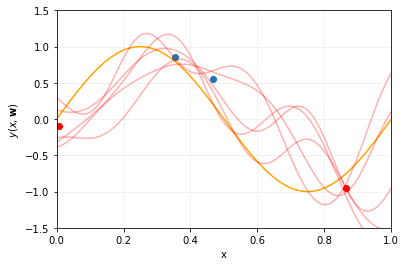

In [7]:
### After fourth observation
for i in range(2):
    X = np.concatenate(([1], calc_gaussian_basis(x_sample[i+2], mus, s))).reshape(1, 10)
    w0 = wN.copy()
    S0 = SN.copy()
    SN = inv(inv(S0) + beta * np.dot(X.T, X))
    wN = np.dot(SN, (np.dot(inv(S0), w0) + beta * X.T * t[i+2]))

pred_mean = np.asarray([calc_pred_mean(k, wN, mus, s) for k in x_base])
pred_var = np.asarray([calc_pred_var(k, SN, mus, s, beta) for k in x_base])

#plt.figure(figsize = (12,6))
#plt.subplot(121)
plt.plot(x_base, y, 'orange')
plt.plot(x_sample[0:2], t[0:2], 'o')
plt.plot(x_sample[2:4], t[2:4], 'ro')
plt.plot(x_base, pred_mean, 'red')
plt.xlim([0,1]); plt.ylim([-1.5,1.5])
plt.xlabel('x'); plt.ylabel(r'$y(x,\mathbf{w})$')
plt.fill_between(x_base, pred_mean - np.sqrt(pred_var), pred_mean + np.sqrt(pred_var), color = 'pink', alpha=0.7)
plt.grid(alpha = 0.2)
plt.show()

# samples from y(x,w)
#plt.subplot(122)
plt.plot(x_base, y, 'orange')
plt.plot(x_sample[0:2], t[0:2], 'o')
plt.plot(x_sample[2:4], t[2:4], 'ro')
plt.xlim([0,1]); plt.ylim([-1.5,1.5])
plt.xlabel('x'); plt.ylabel(r'$y(x,\mathbf{w})$')
plt.grid(alpha = 0.2)
for i in range(5):
    w_sample = np.squeeze(np.random.multivariate_normal(np.squeeze(wN), SN, 1))
    pred_sample = np.asarray([calc_pred_mean(k, w_sample, mus, s) for k in x_base])
    plt.plot(x_base, pred_sample, 'red', alpha=0.3)
plt.show()

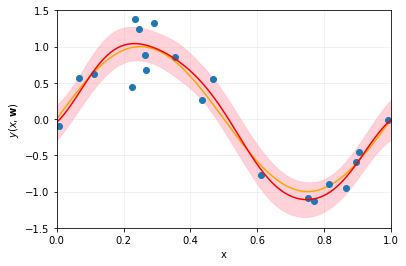

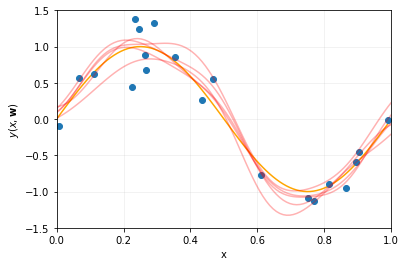

In [8]:
### After all observations
for i in range(sample_size - 4):
    X = np.concatenate(([1], calc_gaussian_basis(x_sample[i+2], mus, s))).reshape(1, 10)
    w0 = wN.copy()
    S0 = SN.copy()
    SN = inv(inv(S0) + beta * np.dot(X.T, X))
    wN = np.dot(SN, (np.dot(inv(S0), w0) + beta * X.T * t[i+2]))

pred_mean = np.asarray([calc_pred_mean(k, wN, mus, s) for k in x_base])
pred_var = np.asarray([calc_pred_var(k, SN, mus, s, beta) for k in x_base])

#plt.figure(figsize = (12,6))
#plt.subplot(121)
plt.plot(x_base, y, 'orange')
plt.plot(x_sample, t, 'o')
plt.plot(x_base, pred_mean, 'red')
plt.xlim([0,1]); plt.ylim([-1.5,1.5])
plt.xlabel('x'); plt.ylabel(r'$y(x,\mathbf{w})$')
plt.fill_between(x_base, pred_mean - np.sqrt(pred_var), pred_mean + np.sqrt(pred_var), color = 'pink', alpha=0.7)
plt.grid(alpha = 0.2)
plt.show()

# samples from y(x,w)
#plt.subplot(122)
plt.plot(x_base, y, 'orange')
plt.plot(x_sample, t, 'o')
plt.xlim([0,1]); plt.ylim([-1.5,1.5])
plt.xlabel('x'); plt.ylabel(r'$y(x,\mathbf{w})$')
plt.grid(alpha = 0.2)
for i in range(5):
    w_sample = np.squeeze(np.random.multivariate_normal(np.squeeze(wN), SN, 1))
    pred_sample = np.asarray([calc_pred_mean(k, w_sample, mus, s) for k in x_base])
    plt.plot(x_base, pred_sample, 'red', alpha=0.3)
plt.show()